In [3]:
from litgpt import LLM

llm = LLM.load("Qwen/Qwen2.5-Coder-1.5B-Instruct")
text = llm.generate("Fix the spelling: Every fall, the familly goes to the mountains.")
print(text)
      

Every fall, the family goes to the mountains.


In [4]:
!litgpt download NousResearch/Hermes-3-Llama-3.2-3B

Unsupported `repo_id`: NousResearch/Hermes-3-Llama-3.2-3B.
If you are trying to download alternative weights for a supported model, please specify the corresponding model via the `--model_name` option, for example, `litgpt download NousResearch/Hermes-2-Pro-Llama-3-8B --model_name Llama-3-8B`.
Alternatively, please choose a valid `repo_id` from the list of supported models, which can be obtained via `litgpt download list`.


In [5]:
# !litgpt download list

Please specify --repo_id <repo_id>. Available values:
allenai/OLMo-1B-hf
allenai/OLMo-7B-hf
allenai/OLMo-7B-Instruct-hf
BSC-LT/salamandra-2b
BSC-LT/salamandra-2b-instruct
BSC-LT/salamandra-7b
BSC-LT/salamandra-7b-instruct
codellama/CodeLlama-13b-hf
codellama/CodeLlama-13b-Instruct-hf
codellama/CodeLlama-13b-Python-hf
codellama/CodeLlama-34b-hf
codellama/CodeLlama-34b-Instruct-hf
codellama/CodeLlama-34b-Python-hf
codellama/CodeLlama-70b-hf
codellama/CodeLlama-70b-Instruct-hf
codellama/CodeLlama-70b-Python-hf
codellama/CodeLlama-7b-hf
codellama/CodeLlama-7b-Instruct-hf
codellama/CodeLlama-7b-Python-hf
deepseek-ai/DeepSeek-R1-Distill-Llama-70B
deepseek-ai/DeepSeek-R1-Distill-Llama-8B
EleutherAI/pythia-1.4b
EleutherAI/pythia-1.4b-deduped
EleutherAI/pythia-12b
EleutherAI/pythia-12b-deduped
EleutherAI/pythia-14m
EleutherAI/pythia-160m
EleutherAI/pythia-160m-deduped
EleutherAI/pythia-1b
EleutherAI/pythia-1b-deduped
EleutherAI/pythia-2.8b
EleutherAI/pythia-2.8b-deduped
EleutherAI/pythia-31m
El

In [1]:
!litgpt download Qwen/Qwen2.5-Coder-3B-Instruct

/bin/bash: line 1: litgpt: command not found



=== Performance Metrics ===
Prompt                         Tokens     Time (s)   Memory (MB) GPU Mem (MB) Tokens/s  

Prompt: What is your name?
Generated text:  I am Qwen, an AI developed by Alibaba Cloud, designed to assist with various tasks and help users with their questions.
                               21         1.05       0.17       44.00        19.93     

Prompt: What is the capital of France?
Generated text:  Paris is the capital of France.
                               6          0.29       0.02       22.00        20.37     

Prompt: What do you think the future of AI will be?
Generated text:  As an AI language model, I cannot predict the future, but I can share some insights on what could be the growth and potential direction of AI in the coming years. 

AI currently has the potential to revolutionize many aspects of our lives, from
                               44         1.68       0.01       24.00        26.25     

Prompt: What is the tallest mountain in the worl

/tmp/ipykernel_2259/2422043401.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prompts_list, y=tokens_list, ax=axes[0, 0], palette="Blues")
/tmp/ipykernel_2259/2422043401.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(prompts_list, rotation=30, ha="right")
/tmp/ipykernel_2259/2422043401.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prompts_list, y=time_list, ax=axes[0, 1], palette="Oranges")
/tmp/ipykernel_2259/2422043401.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


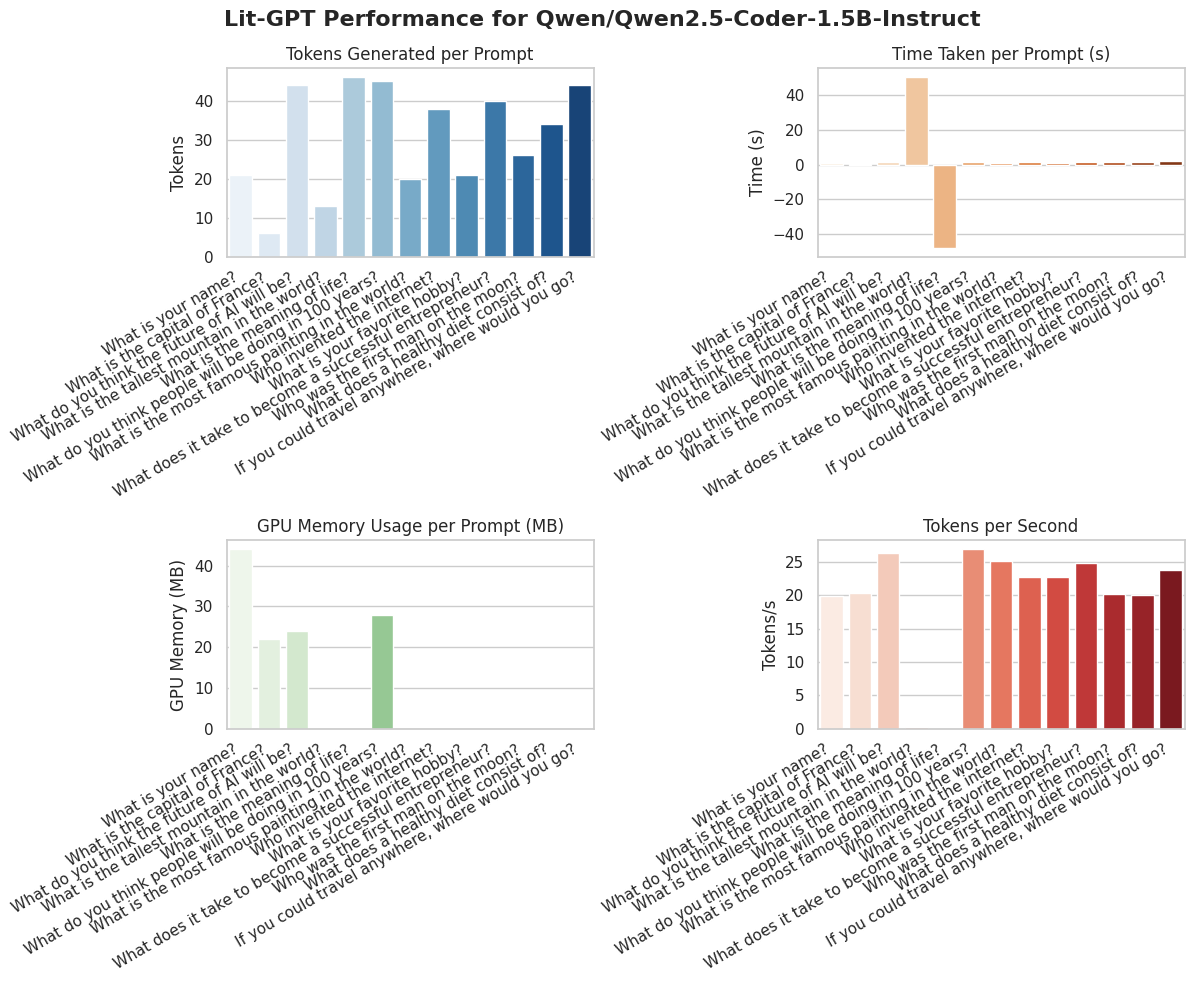

In [3]:
import time
import psutil
import tracemalloc
import pynvml
import seaborn as sns
import matplotlib.pyplot as plt

# Lit-GPT import
from litgpt import LLM

# Specify your model name or path
model_name = "Qwen/Qwen2.5-Coder-1.5B-Instruct"

# Initialize the Lit-GPT model
llm = LLM.load(model_name)

# Lists to store performance metrics
prompts_list = []
tokens_list = []
time_list = []
memory_list = []
gpu_memory_list = []
tokens_per_sec_list = []

def monitor_generation(prompts):
    """
    Measures token generation speed, time, and resource usage (CPU, memory, and GPU) 
    while generating text with Lit-GPT. Stores data for visualization with Seaborn.
    """
    tracemalloc.start()
    pynvml.nvmlInit()
    start_time = time.time()
    total_tokens = 0
    gpu_handle = pynvml.nvmlDeviceGetHandleByIndex(0)

    print("\n=== Performance Metrics ===")
    print(f"{'Prompt':<30} {'Tokens':<10} {'Time (s)':<10} {'Memory (MB)':<10} {'GPU Mem (MB)':<12} {'Tokens/s':<10}")

    # Generate text per prompt to monitor usage individually
    for prompt in prompts:
        print(f"\nPrompt: {prompt}")
        prompt_start_time = time.time()
        
        # Take memory snapshot before generating
        snapshot_before = tracemalloc.take_snapshot()
        gpu_mem_before = pynvml.nvmlDeviceGetMemoryInfo(gpu_handle).used / (1024 * 1024)

        # Generate text using Lit-GPT
        text = llm.generate(prompt)

        # Print the generated text
        print("Generated text: ", text, flush=True)
        
        # Approximate token count by splitting on whitespace
        prompt_token_count = len(text.split())

        # Take memory snapshot after generating
        snapshot_after = tracemalloc.take_snapshot()
        memory_diff = snapshot_after.compare_to(snapshot_before, "lineno")
        total_memory = sum(stat.size_diff for stat in memory_diff) / (1024 * 1024)

        gpu_mem_after = pynvml.nvmlDeviceGetMemoryInfo(gpu_handle).used / (1024 * 1024)
        gpu_memory_used = gpu_mem_after - gpu_mem_before
        
        prompt_end_time = time.time()
        prompt_time = prompt_end_time - prompt_start_time

        tokens_per_second = prompt_token_count / prompt_time if prompt_time > 0 else 0
        total_tokens += prompt_token_count

        # Store data for visualization
        prompts_list.append(prompt)
        tokens_list.append(prompt_token_count)
        time_list.append(prompt_time)
        memory_list.append(total_memory)
        gpu_memory_list.append(gpu_memory_used)
        tokens_per_sec_list.append(tokens_per_second)

        print(f"{'':<30} {prompt_token_count:<10} {prompt_time:<10.2f} {total_memory:<10.2f} {gpu_memory_used:<12.2f} {tokens_per_second:<10.2f}")

    end_time = time.time()
    total_time = end_time - start_time

    # CPU & Memory usage (for the entire run)
    process = psutil.Process()
    cpu_usage = process.cpu_percent(interval=0.1)
    memory_usage = process.memory_info().rss / (1024 * 1024)
    gpu_utilization = pynvml.nvmlDeviceGetUtilizationRates(gpu_handle).gpu

    # Print overall stats
    print("\n=== Overall Metrics ===")
    print(f"Total Tokens: {total_tokens}")
    print(f"Total Time: {total_time:.2f} seconds")
    print(f"Average Tokens/s: {total_tokens / total_time:.2f}")
    print(f"CPU Usage: {cpu_usage:.2f}%")
    print(f"Memory Usage: {memory_usage:.2f} MB")
    print(f"GPU Utilization: {gpu_utilization:.2f}%")

    # Shutdown NVML
    pynvml.nvmlShutdown()

def visualize_results():
    """
    Uses Seaborn to visualize performance metrics.
    """
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Give the figure a title indicating Lit-GPT and the model name
    fig.suptitle(f"Lit-GPT Performance for {model_name}", fontsize=16, fontweight='bold')

    # Tokens per prompt
    sns.barplot(x=prompts_list, y=tokens_list, ax=axes[0, 0], palette="Blues")
    axes[0, 0].set_title("Tokens Generated per Prompt")
    axes[0, 0].set_ylabel("Tokens")
    axes[0, 0].set_xticklabels(prompts_list, rotation=30, ha="right")

    # Time per prompt
    sns.barplot(x=prompts_list, y=time_list, ax=axes[0, 1], palette="Oranges")
    axes[0, 1].set_title("Time Taken per Prompt (s)")
    axes[0, 1].set_ylabel("Time (s)")
    axes[0, 1].set_xticklabels(prompts_list, rotation=30, ha="right")

    # GPU memory usage
    sns.barplot(x=prompts_list, y=gpu_memory_list, ax=axes[1, 0], palette="Greens")
    axes[1, 0].set_title("GPU Memory Usage per Prompt (MB)")
    axes[1, 0].set_ylabel("GPU Memory (MB)")
    axes[1, 0].set_xticklabels(prompts_list, rotation=30, ha="right")

    # Tokens per second
    sns.barplot(x=prompts_list, y=tokens_per_sec_list, ax=axes[1, 1], palette="Reds")
    axes[1, 1].set_title("Tokens per Second")
    axes[1, 1].set_ylabel("Tokens/s")
    axes[1, 1].set_xticklabels(prompts_list, rotation=30, ha="right")

    plt.tight_layout()
    plt.show()

# Define prompts
prompts = [
    "What is your name?",
    "What is the capital of France?",
    "What do you think the future of AI will be?",
    "What is the tallest mountain in the world?",
    "What is the meaning of life?",
    "What do you think people will be doing in 100 years?",
    "What is the most famous painting in the world?",
    "Who invented the internet?",
    "What is your favorite hobby?",
    "What does it take to become a successful entrepreneur?",
    "Who was the first man on the moon?",
    "What does a healthy diet consist of?",
    "If you could travel anywhere, where would you go?"
]

# Run the monitoring function
monitor_generation(prompts)

# Visualize results
visualize_results()


In [2]:
!pip install pynvml seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached nvidia_ml_py-12.570.86-py3-none-any.whl (44 kB)
  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.55.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached pillow-11.1.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (324 kB)
